# Bayesian signal reconstruction with Gaussian Random Fields (Wiener Filtering)

Florent Leclercq,<br/>
Institute of Cosmology and Gravitation, University of Portsmouth,<br/>
florent.leclercq@polytechnique.org

In [1]:
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N=1000
epsilon=0.000000000001

## Setup signal covariance

In [3]:
t=np.array([100./(f*f) for f in xrange(1,N/2)])
signalcovar=np.concatenate([np.zeros(1),t,t[::-1],np.zeros(1)])

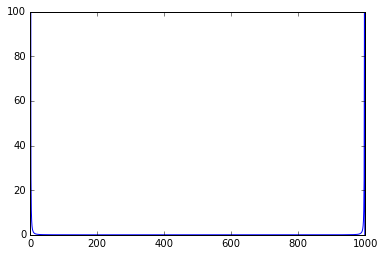

In [4]:
plt.plot(np.arange(N),signalcovar)
plt.show()

In [5]:
sqrtsignalcovar=np.diagflat(np.sqrt(signalcovar))
sqrtsignalcovarPix=np.fft.ifft(np.fft.fft(sqrtsignalcovar).T).T

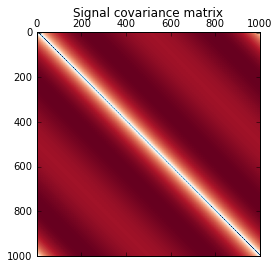

In [6]:
plt.matshow(sqrtsignalcovarPix.real, cmap='RdBu')
plt.title("Signal covariance matrix")
plt.show()

## Setup mask

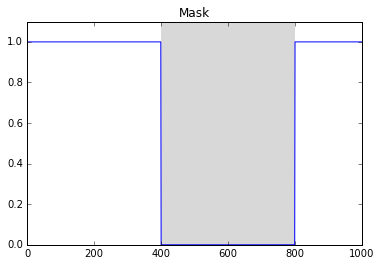

In [7]:
mask=np.ones(N)
mask[400:800]=0.
plt.ylim(0,1.1)
plt.plot(np.arange(N),mask)
plt.fill_between([400,800],0.,1.1,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Mask")
plt.show()

## Setup noise covariance

In [8]:
noisepower=0.00001
noisecovar=noisepower*np.concatenate([np.ones(N/2),10000*np.ones(N/2)])

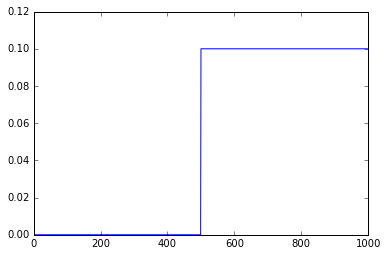

In [9]:
plt.plot(np.arange(N),noisecovar)
plt.show()

In [10]:
invnoisecovarmat=np.diagflat(mask/noisecovar)

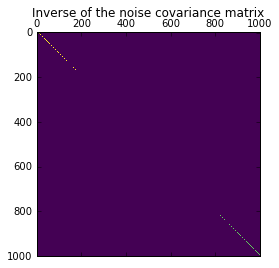

In [11]:
plt.matshow(np.log(invnoisecovarmat+epsilon), cmap='viridis')
plt.title("Inverse of the noise covariance matrix")
plt.show()

## Generate mock data

Data model: $d=s+n$

In [13]:
#The truth
normalsim=np.random.normal(0.,1.,N)
s=sqrtsignalcovarPix.real.dot(normalsim)

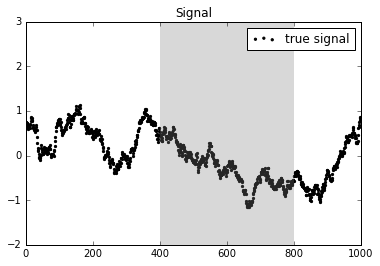

In [14]:
plt.xlim(0,N)
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Signal")
plt.legend(loc='best')
plt.show()

In [15]:
#The noise, with infinite variance in masked regions
normalsim=np.random.normal(0.,1.,N)
n=normalsim/np.sqrt(np.diag(invnoisecovarmat)+epsilon)
d=s+n

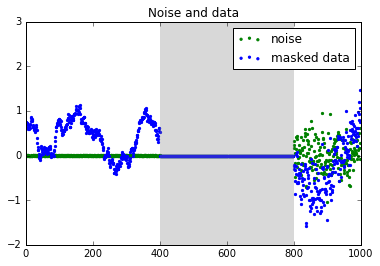

In [16]:
plt.xlim(0,N)
plt.ylim(-2,3)
plt.scatter(np.arange(N),mask*n,marker='.',color='green',label="noise")
plt.scatter(np.arange(N),mask*d,marker='.',color='blue',label="masked data")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Noise and data")
plt.legend(loc='best')
plt.show()

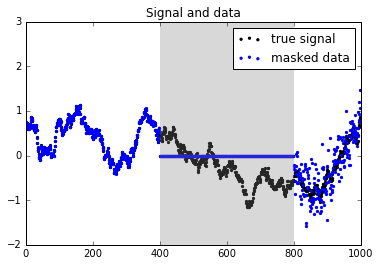

In [17]:
plt.xlim(0,N)
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.scatter(np.arange(N),mask*d,marker='.',color='blue',label="masked data")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Signal and data")
plt.legend(loc="best")
plt.show()

## Setup Wiener Filter

Covariance of the Wiener Filter:
\begin{equation}
\mathrm{Cov}_\mathrm{WF} = (N^{-1}+S^{-1})^{-1} = S^{1/2}(I+S^{1/2}N^{-1}S^{1/2})^{-1}S^{1/2}
\end{equation}

In [19]:
M=np.identity(N)+sqrtsignalcovarPix.dot(invnoisecovarmat).dot(sqrtsignalcovarPix)
CovWF=sqrtsignalcovarPix.dot(np.linalg.inv(M)).dot(sqrtsignalcovarPix)
CovWF=(CovWF+CovWF.T)/2
sqrtCovWF=scipy.linalg.sqrtm(CovWF)

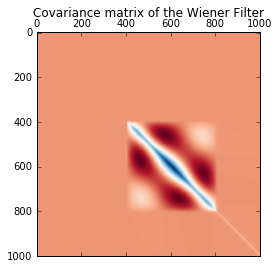

In [20]:
plt.matshow(CovWF.real, cmap='RdBu')
plt.title("Covariance matrix of the Wiener Filter")
plt.show()

## Perform signal reconstruction (apply Wiener Filtering)

Mean of the Wiener posterior:
\begin{equation}
s_\mathrm{WF} = \mathrm{Cov}_\mathrm{WF} N^{-1} d
\end{equation}

In [22]:
sWF=CovWF.dot(invnoisecovarmat).dot(d).real

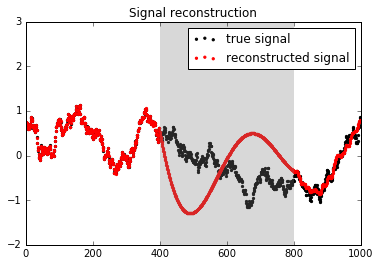

In [23]:
plt.xlim(0,N)
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.scatter(np.arange(N),sWF,marker='.',color='red',label="reconstructed signal")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Signal reconstruction")
plt.legend(loc='best')
plt.show()

## Generate constrained realizations (draw samples from the Wiener posterior)

Samples of the Wiener posterior:
\begin{equation}
s=s_\mathrm{WF}+\sqrt{C_\mathrm{WF}} \, G(0,1)
\end{equation}
so that $\left\langle s \right\rangle = s_\mathrm{WF}$ and $\mathrm{Cov}(s) = C_\mathrm{WF}$

In [25]:
cr1=sqrtCovWF.dot(np.random.normal(0.,1.,N)).real+sWF
cr2=sqrtCovWF.dot(np.random.normal(0.,1.,N)).real+sWF
cr3=sqrtCovWF.dot(np.random.normal(0.,1.,N)).real+sWF

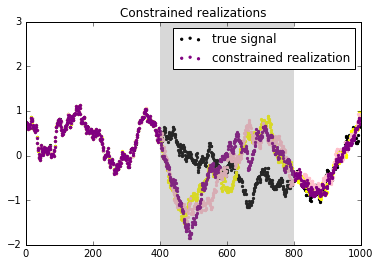

In [26]:
plt.xlim(0,N)
plt.ylim(-2,3)
plt.scatter(np.arange(N),s,marker='.',color='black',label="true signal")
plt.scatter(np.arange(N),cr1,marker='.',color='yellow')
plt.scatter(np.arange(N),cr2,marker='.',color='pink')
plt.scatter(np.arange(N),cr3,marker='.',color='purple',label="constrained realization")
plt.fill_between([400,800],-2,3,facecolor='grey',alpha=0.3, linewidth=0.)
plt.title("Constrained realizations")
plt.legend(loc='best')
plt.show()

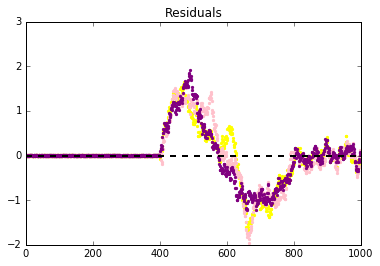

In [27]:
plt.xlim(0,N)
plt.ylim(-2,3)
plt.scatter(np.arange(N),s-cr1,marker='.',color='yellow')
plt.scatter(np.arange(N),s-cr2,marker='.',color='pink')
plt.scatter(np.arange(N),s-cr3,marker='.',color='purple')
plt.plot([0,N],[0,0],color='black',linestyle='--',linewidth=2)
plt.title("Residuals")
plt.show()